In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

from os.path import exists
#
if not exists(".isparent"):
    %cd -q ../
! echo "current working dir:" $(pwd)

current working dir: /home/opisthofulax/PhD/projects/ising-model


In [3]:
pthconfig = "res/config/.config_acf_test"
df = pd.read_csv(pthconfig)
df

,tMC,N_M,nconf,_m_sav,Navg,L1,L2,Ls,b_m,b_M,b_s,_m_init,_m_upd,_m_mea
0,1,200,3,1,20,10,10,10,0.01,0.44,0.02,hs_unif,algo_metro_a,0


In [4]:
L1, L2 = df['L1'][0], df['L2'][0];
N = L1 * L2
Nlst = []
while (N <= df['N_M'][0]):
    Nlst.append(N)
    L1 += df['Ls'][0]
    L2 += df['Ls'][0]
    N = L1 * L2;
L1, L2 = df['L1'][0], df['L2'][0];
N = L1 * L2
betalst = np.arange(df['b_m'][0], df['b_M'][0], df['b_s'][0])
#
color = plt.cm.rainbow(np.linspace(0, 1, len(Nlst)))
norm = mpc.Normalize(vmin=min(betalst), vmax=max(betalst))
cmap = plt.cm.gist_rainbow_r

In [43]:
N=100
sizepath = f"N={L1*L2:d}" if L1 == L2 else f"L1={L1:d}_L2={L2:d}"
tlist = [t for t in range(0, 300)]
pathtoconfig = [f"res/unconf/N={N:d}-{df['_m_init'][0]}-{df['_m_upd'][0]}/bt={beta:.2g}/SCONF_t={t:d}.bin"
    for beta in [0.19] for t in tlist]

In [44]:
config = [np.fromfile(pth, dtype=np.int8).reshape(L1, L2) for pth in pathtoconfig]

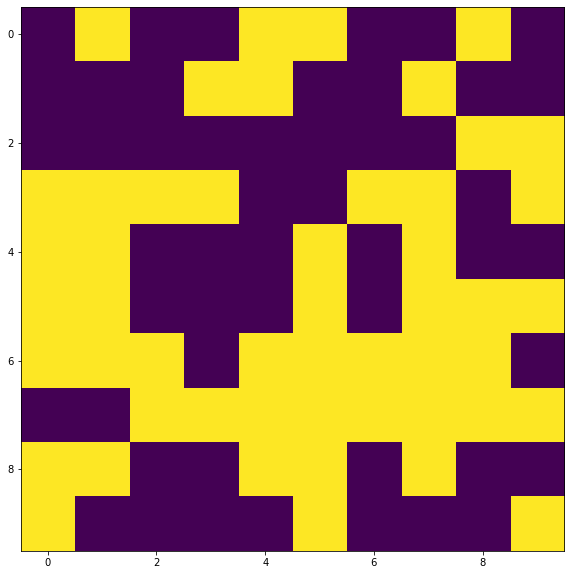

In [47]:
plt.figure(figsize=(10, 10))
plt.imshow(config[4])

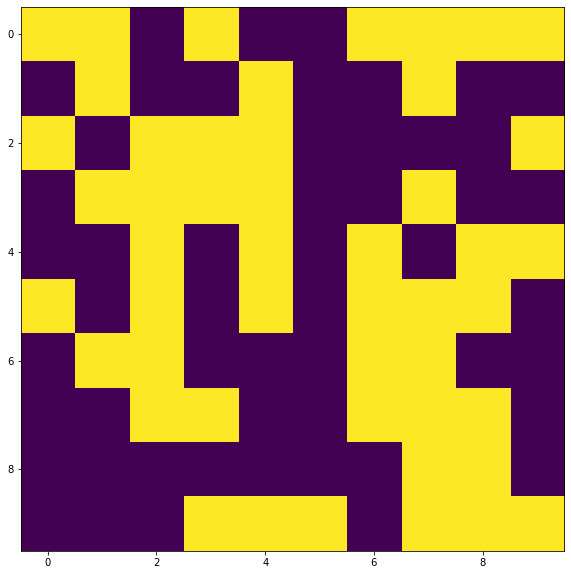

In [48]:
plt.figure(figsize=(10, 10))
plt.imshow(config[10])

(array([ 1., 10., 12.,  0., 26., 14.,  0., 28.,  7.,  2.]),
 array([-8. , -6.6, -5.2, -3.8, -2.4, -1. ,  0.4,  1.8,  3.2,  4.6,  6. ]),
 <BarContainer object of 10 artists>)

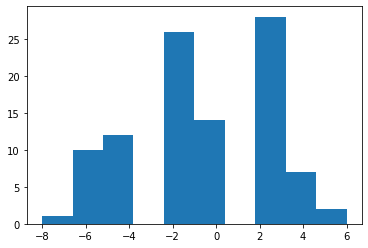

In [40]:
plt.hist((config[0]@config[0]).flatten())

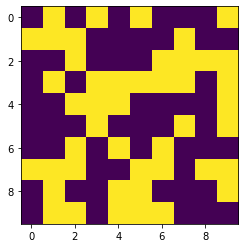

In [19]:
np.arange(0.0, 1.0, 1)

array([0.])